## 0.0 Import libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.0 Get data and Exploration

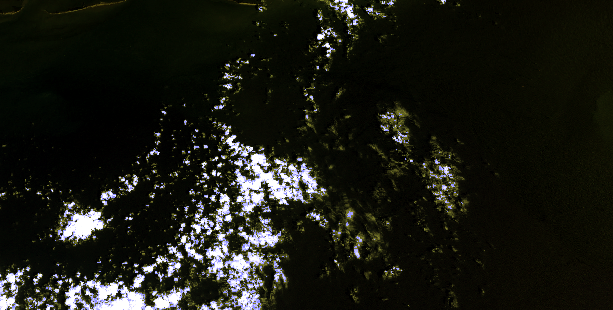|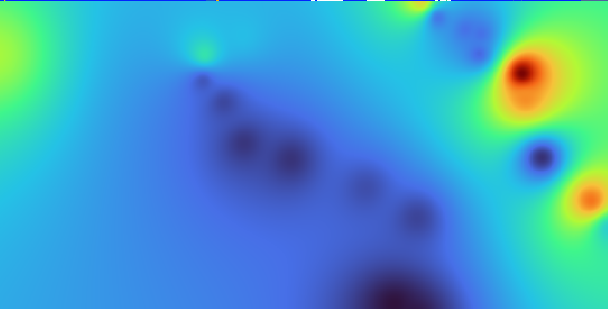

In [4]:
data_path = "/content/drive/MyDrive/water_quality/mobile_bay/2007-05-08.csv"

In [5]:
data = pd.read_csv(data_path)

In [6]:
data

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6
0,9769.0,10616.0,10216.0,8987.0,8405.0,8021.0,9.877915,32.0,42154.0
1,9834.0,10748.0,10109.0,8987.0,8488.0,8140.0,9.877915,32.0,42154.0
2,9964.0,10616.0,10323.0,8987.0,8405.0,8258.0,9.877915,32.0,42154.0
3,9834.0,10748.0,10215.0,8987.0,8488.0,8258.0,9.872737,32.0,42154.0
4,9834.0,10616.0,10323.0,9114.0,8488.0,8258.0,9.872737,32.0,42154.0
...,...,...,...,...,...,...,...,...,...
5750505,10251.0,10452.0,10403.0,10344.0,10058.0,9895.0,7.673080,32.0,43664.0
5750506,9930.0,9925.0,9663.0,9848.0,9560.0,9190.0,7.673080,0.0,43664.0
5750507,10124.0,10320.0,10192.0,10096.0,10141.0,9778.0,7.677982,32.0,43664.0
5750508,10251.0,10320.0,10298.0,10344.0,10224.0,10013.0,7.677982,0.0,43664.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750510 entries, 0 to 5750509
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   B1      float64
 1   B2      float64
 2   B3      float64
 3   B4      float64
 4   B5      float64
 5   B7      float64
 6   CHLA    float64
 7   QA      float64
 8   B6      float64
dtypes: float64(9)
memory usage: 394.9 MB


In [8]:
data.describe()

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6
count,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06,5.750510e+06
mean,1.376191e+04,1.178986e+04,1.170377e+04,1.117077e+04,1.153356e+04,1.014421e+04,5.699801e+00,3.003980e+01,4.243406e+04
std,1.359434e+04,5.849147e+03,7.749945e+03,6.160353e+03,9.123692e+03,3.660382e+03,2.997658e+00,9.457916e+00,1.126782e+03
min,7.726000e+03,7.802000e+03,7.429000e+03,6.461000e+03,7.066000e+03,6.958000e+03,3.400940e-01,0.000000e+00,3.708200e+04
25%,9.550000e+03,9.927000e+03,9.360000e+03,9.104000e+03,8.739000e+03,8.609000e+03,3.604132e+00,3.200000e+01,4.219900e+04
50%,9.762000e+03,1.007600e+04,9.674000e+03,9.478000e+03,9.233000e+03,8.964000e+03,5.184097e+00,3.200000e+01,4.287400e+04
75%,1.025300e+04,1.059300e+04,1.010200e+04,9.859000e+03,9.730000e+03,9.429000e+03,6.785308e+00,3.200000e+01,4.316500e+04
max,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,3.363000e+04,2.324801e+01,4.000000e+01,4.808100e+04


In [9]:
data['CHLA'].value_counts()

,count
CHLA,
2.864981,33
2.488682,27
10.000580,27
3.037833,27
5.207312,27
...,...
2.532541,6
3.261003,6
3.552934,6


In [10]:
data.isnull().sum()

,0
B1,0
B2,0
B3,0
B4,0
B5,0
B7,0
CHLA,0
QA,0
B6,0


In [11]:
data['QA'].value_counts()

,count
QA,
32.0,4408267
40.0,559088
2.0,302413
0.0,198357
34.0,180967
36.0,63663
8.0,31883
1.0,4012
4.0,1859


<Axes: >

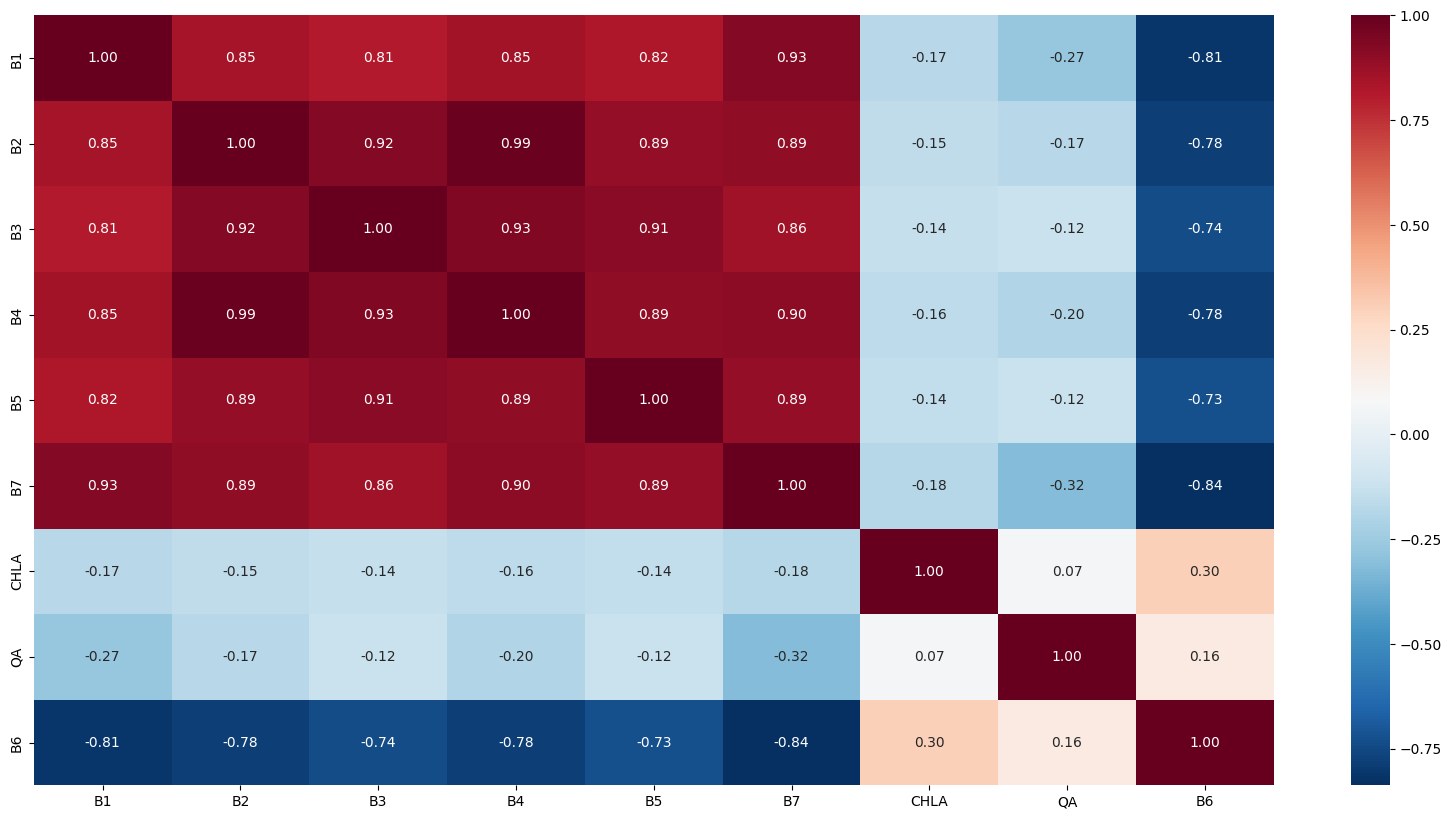

In [12]:
data_cor_train = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data_cor_train,
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",)

## 2.0 Pre-Processing

### Remove null values

In [13]:
data.isnull().sum()

,0
B1,0
B2,0
B3,0
B4,0
B5,0
B7,0
CHLA,0
QA,0
B6,0


### Removing cloud and cloud shadow pixels


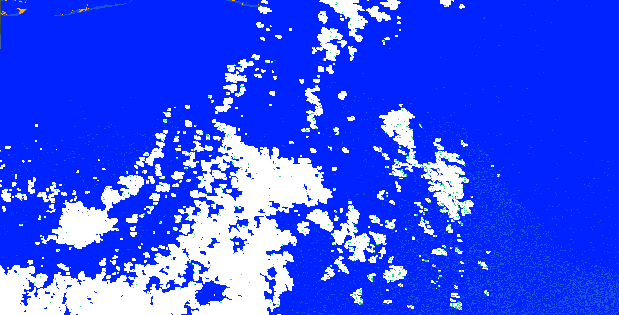

In [15]:
new_data = data[~data['QA'].isin([34, 2, 36, 40])]

In [16]:
new_data['QA'].value_counts()

,count
QA,
32.0,4408267
0.0,198357
8.0,31883
1.0,4012
4.0,1859
16.0,1


### Removing land pixels

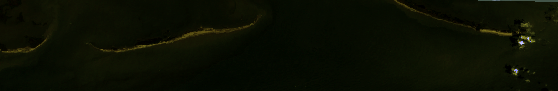

In [17]:
new_data

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6
0,9769.0,10616.0,10216.0,8987.0,8405.0,8021.0,9.877915,32.0,42154.0
1,9834.0,10748.0,10109.0,8987.0,8488.0,8140.0,9.877915,32.0,42154.0
2,9964.0,10616.0,10323.0,8987.0,8405.0,8258.0,9.877915,32.0,42154.0
3,9834.0,10748.0,10215.0,8987.0,8488.0,8258.0,9.872737,32.0,42154.0
4,9834.0,10616.0,10323.0,9114.0,8488.0,8258.0,9.872737,32.0,42154.0
...,...,...,...,...,...,...,...,...,...
5750505,10251.0,10452.0,10403.0,10344.0,10058.0,9895.0,7.673080,32.0,43664.0
5750506,9930.0,9925.0,9663.0,9848.0,9560.0,9190.0,7.673080,0.0,43664.0
5750507,10124.0,10320.0,10192.0,10096.0,10141.0,9778.0,7.677982,32.0,43664.0
5750508,10251.0,10320.0,10298.0,10344.0,10224.0,10013.0,7.677982,0.0,43664.0


In [18]:
new_data['NDWI'] = (new_data['B2'] - new_data['B4']) / (new_data['B2'] + new_data['B4'])

threshold = -0.091701

new_data.describe()

<ipython-input-18-db20695f5a1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['NDWI'] = (new_data['B2'] - new_data['B4']) / (new_data['B2'] + new_data['B4'])


,B1,B2,B3,B4,B5,B7,CHLA,QA,B6,NDWI
count,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06,4.644379e+06
mean,9.790276e+03,1.011406e+04,9.670650e+03,9.400278e+03,9.160598e+03,8.926308e+03,6.100307e+00,3.043056e+01,4.285721e+04,3.691835e-02
std,5.546658e+02,5.804856e+02,5.952983e+02,6.728633e+02,7.177634e+02,6.027750e+02,3.154630e+00,6.809487e+00,4.623622e+02,2.188906e-02
min,8.256000e+03,8.322000e+03,7.964000e+03,7.732000e+03,7.066000e+03,6.958000e+03,3.400940e-01,0.000000e+00,3.994600e+04,-3.341938e-01
25%,9.493000e+03,9.804000e+03,9.350000e+03,8.984000e+03,8.734000e+03,8.494000e+03,3.913300e+00,3.200000e+01,4.254900e+04,2.343551e-02
50%,9.684000e+03,1.006400e+04,9.664000e+03,9.355000e+03,9.072000e+03,8.847000e+03,5.632780e+00,3.200000e+01,4.300800e+04,3.625880e-02
75%,9.937000e+03,1.032800e+04,9.882000e+03,9.610000e+03,9.479000e+03,9.195000e+03,7.454349e+00,3.200000e+01,4.319300e+04,4.364725e-02
max,6.553500e+04,2.297700e+04,2.322900e+04,2.396000e+04,2.451100e+04,3.136300e+04,2.324801e+01,3.200000e+01,4.808100e+04,1.401554e-01


In [19]:
# Retirando as linhas onde NDWI < threshold, esses pixels representam o solo
new_data = new_data[new_data['NDWI'] >= threshold]
new_data

,B1,B2,B3,B4,B5,B7,CHLA,QA,B6,NDWI
0,9769.0,10616.0,10216.0,8987.0,8405.0,8021.0,9.877915,32.0,42154.0,0.083100
1,9834.0,10748.0,10109.0,8987.0,8488.0,8140.0,9.877915,32.0,42154.0,0.089232
2,9964.0,10616.0,10323.0,8987.0,8405.0,8258.0,9.877915,32.0,42154.0,0.083100
3,9834.0,10748.0,10215.0,8987.0,8488.0,8258.0,9.872737,32.0,42154.0,0.089232
4,9834.0,10616.0,10323.0,9114.0,8488.0,8258.0,9.872737,32.0,42154.0,0.076128
...,...,...,...,...,...,...,...,...,...,...
5750505,10251.0,10452.0,10403.0,10344.0,10058.0,9895.0,7.673080,32.0,43664.0,0.005193
5750506,9930.0,9925.0,9663.0,9848.0,9560.0,9190.0,7.673080,0.0,43664.0,0.003894
5750507,10124.0,10320.0,10192.0,10096.0,10141.0,9778.0,7.677982,32.0,43664.0,0.010972
5750508,10251.0,10320.0,10298.0,10344.0,10224.0,10013.0,7.677982,0.0,43664.0,-0.001161


### Split Data

In [20]:
from sklearn.model_selection import train_test_split

X = new_data.drop('CHLA', axis=1)
y = new_data['CHLA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

# Separar os dados em treino e teste ANTES da normalização
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Ajustar o scaler APENAS aos dados de treino
scaler.fit(X_train)

# Transformar os dados de treino e teste usando o scaler ajustado com os dados de treino
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regressões

In [22]:
# Regressão Linear Multiplas Variáveis
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[-4.03146894  5.49447681  1.15926103 -3.52218432 -0.10124599  0.42722886
  0.01923614 -0.70080858 -2.26037161]
6.097519351916553


In [23]:
import sympy as sp

# Definindo as variáveis simbólicas
x1, x2, x3 = sp.symbols('x1 x2 x3')
equation = lr.intercept_ + lr.coef_[0] * x1 + lr.coef_[1] * x2 + lr.coef_[2] * x3

print("Equação da regressão linear:")
equation

Equação da regressão linear:


-4.03146894003201*x1 + 5.49447680518975*x2 + 1.15926102606981*x3 + 6.09751935191655

In [24]:
# Regressão Linear Multiplas Variáveis
import numpy as np
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(X_train_scaled)
test_predictions = lr.predict(X_test_scaled)

train_mse = mean_squared_error(train_predictions, y_train)
test_mse = mean_squared_error(test_predictions, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train (RMSE): {}".format(train_rmse))
print("Test (RMSE): {}".format(test_rmse))

Train (RMSE): 2.613631403478323
Test (RMSE): 2.6692128834291418


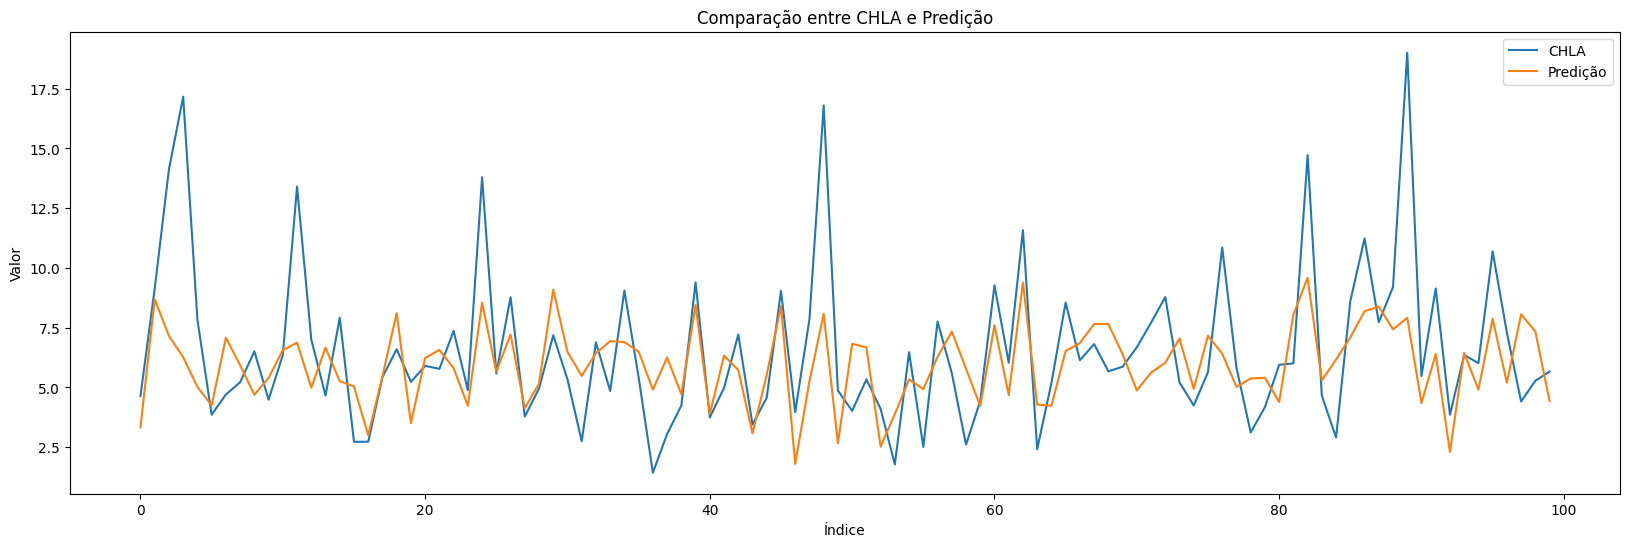

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test.values[:100], label='CHLA')
plt.plot(test_predictions[:100], label='Predição')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparação entre CHLA e Predição')
plt.legend()
plt.show()

In [28]:
from sklearn.neural_network import MLPRegressor

# Criando o modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', random_state=42)

# Treinando o modelo
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 25), random_state=42)

In [35]:
import pickle
filename = '/content/drive/MyDrive/water_quality/mobile_bay/mlp_model.pkl'
# pickle.dump(mlp, open(filename, 'wb'))

loaded_mlp = pickle.load(open(filename, 'rb'))

In [36]:
train_predictions = loaded_mlp.predict(X_train_scaled)
test_predictions = loaded_mlp.predict(X_test_scaled)

# Calculando o RMSE
train_mse = mean_squared_error(train_predictions, y_train)
test_mse = mean_squared_error(test_predictions, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Train (RMSE): {}".format(train_rmse))
print("Test (RMSE): {}".format(test_rmse))

Train (RMSE): 1.4066430352588306
Test (RMSE): 1.4087101036864154


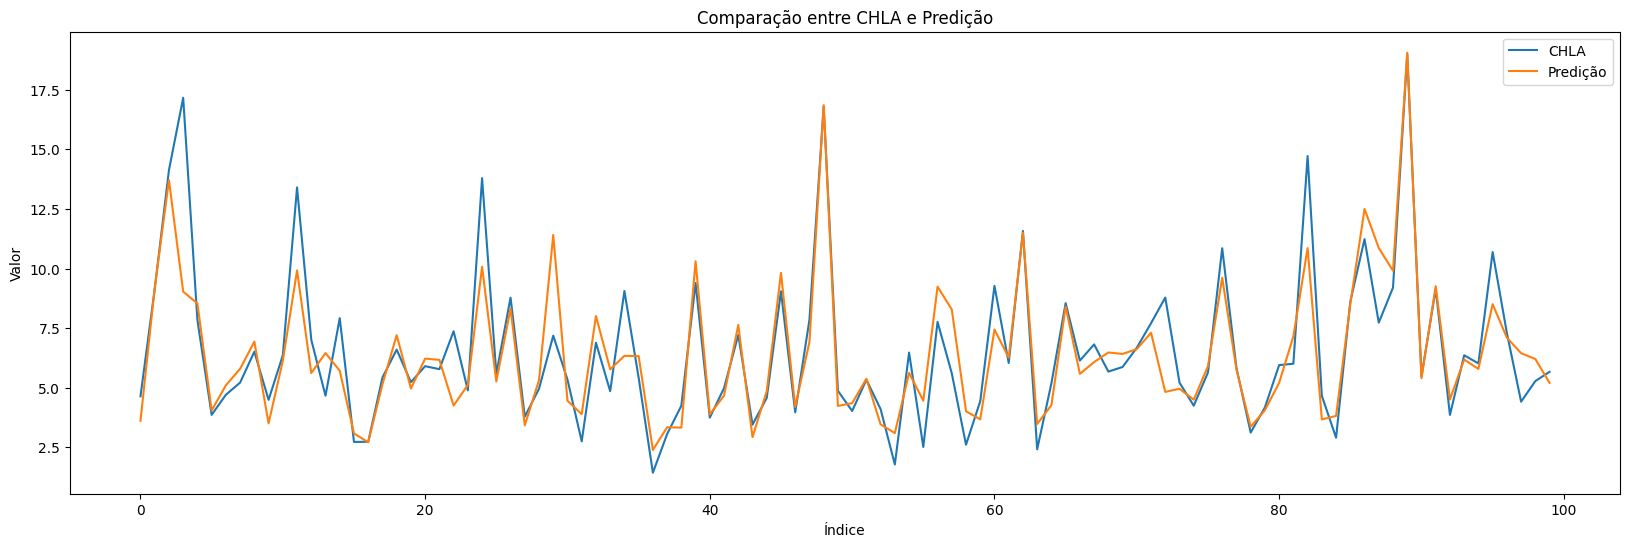

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test.values[:100], label='CHLA')
plt.plot(test_predictions[:100], label='Predição')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparação entre CHLA e Predição')
plt.legend()
plt.show()